In [57]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.activations import sigmoid

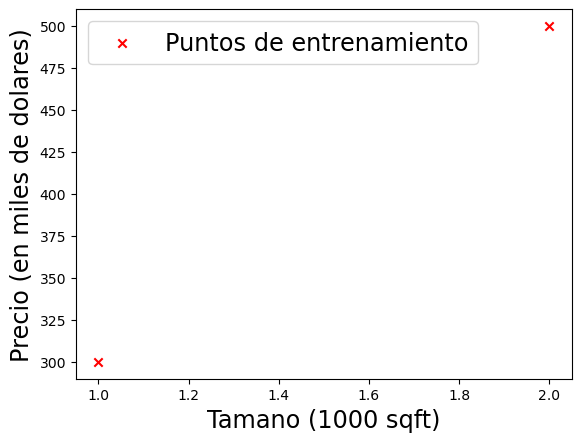

In [14]:
X_train = np.array([[1.0], [2.0]])
Y_train = np.array([[300.0], [500.0]])

fig, ax = plt.subplots(1,1)
ax.scatter(X_train, Y_train, marker='x', c='r', label="Puntos de entrenamiento")
ax.legend( fontsize='xx-large')
ax.set_ylabel('Precio (en miles de dolares)', fontsize='xx-large')
ax.set_xlabel('Tamano (1000 sqft)', fontsize='xx-large')
plt.show()

# Regresion Lineal Modelo
La funcion implementada por una neurona sin activacion es una regresion lineal. Entonces nosotros podemos definir una capa con una neurona y compararlo con la regresion lineal.

In [15]:
linear_layer = tf.keras.layers.Dense(units=1, activation="linear")

In [16]:
linear_layer.get_weights()

[]

No hay pesos instanciados en la capa. Probemos con un ejemplo en el X_train

In [18]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

tf.Tensor([[-1.186245]], shape=(1, 1), dtype=float32)


El resultado es un tensor con un valor, 

In [23]:
w, b= linear_layer.get_weights()
print(f"w = {w}, b={b}")

w = [[-1.186245]], b=[0.]


Vamos a insertar los valores de w y b en la ecuacion de la recta y = w*x + b

In [24]:
set_w = np.array([[200.0]])
set_b = np.array([100.0])

linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [25]:
# Usamos la capa para predecir el valor de Y para el primer valor de X
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

# Usamos la ecuacion de la recta para predecir el valor de Y para el primer valor de X
alin = np.dot(set_w,X_train[0].reshape(1,1)) + set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


In [27]:
prediction_tf = linear_layer(X_train)
prediction_np = np.dot( X_train, set_w) + set_b

print(f"Prediccion con TF: {prediction_tf}")
print(f"Prediccion con Numpy: {prediction_np}")

Prediccion con TF: [[300.]
 [500.]]
Prediccion con Numpy: [[300.]
 [500.]]


In [43]:
def plt_linear(X_train, Y_train, prediction_tf, prediction_np):
    fig, ax = plt.subplots(1,1)
    ax.scatter(X_train, Y_train, marker='x', c='r', label="Puntos de entrenamiento")
    ax.plot(X_train, prediction_tf, label="Prediccion TF")
    ax.plot(X_train, prediction_np, label="Prediccion Numpy")
    ax.legend( fontsize='xx-large')
    ax.set_ylabel('Precio (en miles de dolares)', fontsize='xx-large')
    ax.set_xlabel('Tamano (1000 sqft)', fontsize='xx-large')
    plt.show()

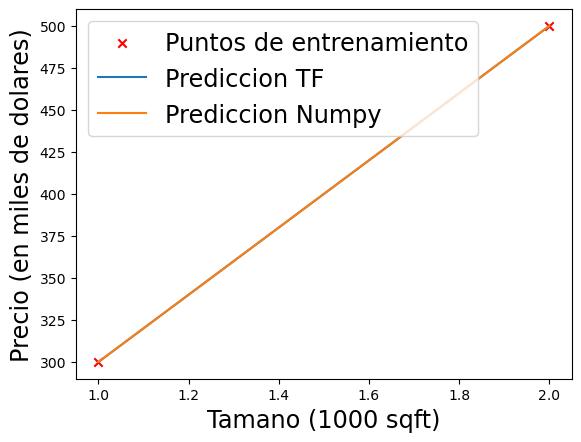

In [44]:
plt_linear(X_train, Y_train, prediction_tf, prediction_np)

# Neurona con Activacion sigmoide
Vamos a usar la regresion logistica.

In [45]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrixplt_linear

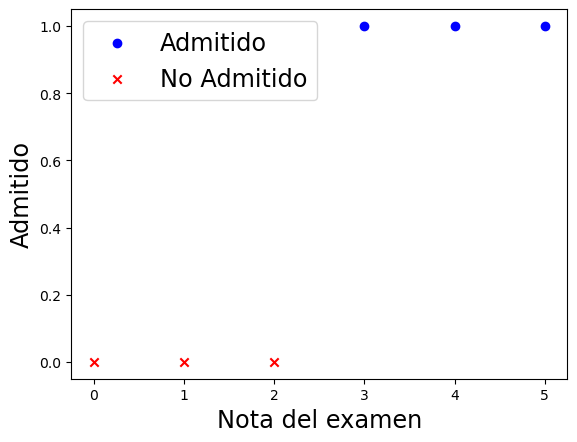

In [48]:
pos = Y_train == 1
neg = Y_train == 0

fig, ax = plt.subplots(1,1)
ax.scatter(X_train[pos], Y_train[pos], marker='o', c='b', label="Admitido")
ax.scatter(X_train[neg], Y_train[neg], marker='x', c='r', label="No Admitido")
ax.legend( fontsize='xx-large')
ax.set_ylabel('Admitido', fontsize='xx-large')
ax.set_xlabel('Nota del examen', fontsize='xx-large')
plt.show()

# Neurona logistica
Podemos definir una capa con una neurona y activacion sigmoide.

In [50]:
model = Sequential(
    [
        tf.keras.layers.Dense(1, input_dim=1,  activation = 'sigmoid', name='L1')
    ]
)

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
model.get_weights()

[array([[-1.2690581]], dtype=float32), array([0.], dtype=float32)]

In [53]:
w, b = model.get_weights()

In [54]:
print(f"w = {w}, b={b}")

w = [[-1.2690581]], b=[0.]


In [55]:
logistic_layer = model.get_layer('L1')
w,b = logistic_layer.get_weights()
print(w,b)
print(w.shape,b.shape)

[[-1.2690581]] [0.]
(1, 1) (1,)


In [56]:
set_w = np.array([[2]])
set_b = np.array([-4.5])

logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [59]:
a1 = model.predict(X_train[0].reshape(1,1))
print(a1)

1/1 [==============================] - 0s 201ms/step
[[0.01098694]]


In [60]:
def sigmoidnp(x):
    return 1/(1+np.exp(-x))

a1 = sigmoidnp(np.dot(X_train[0],set_w) + set_b)
print(a1)

[0.01098694]
